# Creating a Filter, Edge Detection


### Import resources and display image

* 본 실습은 영상처리를 위한 package인 opencv를 활용합니다
* local로 실행하시거나 docker를 통해서 실행해보고자 하면, 아래 명령어로 opencv를 설치하고 실행하도록 합니다.
* 만약 제공해드린 docker에는 opencv가 잘 설치되지 않는 경우, colab를 통해서 실행하도록 하겠습니다.

In [0]:
# docker 사용 시 아래의 코드의 주석을 제거하고 실행하세요.
# !conda install opencv

* 또한, 실습 시 데이터가 필요합니다.
* 데이터 다운의 경우 아래의 셀을 실행하면 실습에 필요한 파일들이 다운로드 됩니다.
* 아래의 셀을 통해 다운이 안되는 경우 다운로드가 불가능한 경우 [notebook_ims](https://drive.google.com/file/d/1zgSKwJ51OEY8o_obkDe71o1JFrI8MOPw/view?usp=sharing), [data](https://drive.google.com/file/d/1WImET2G2YnYx7QWTkUFrd7R3PZPUEgZ6/view?usp=sharing) 해당 링크를 통해 직접 접속하여 다운로드 해주세요.

* 다운로드 후에 F5를 눌러 노트북을 reload 해주시면 이미지가 정상적으로 loading 됩니다.

In [0]:
# 해당 모듈이 필요합니다! 셀을 실행하여 설치하세요.
!pip install googledrivedownloader

In [0]:
import os
from zipfile import ZipFile
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1zgSKwJ51OEY8o_obkDe71o1JFrI8MOPw', dest_path='./notebook_ims.zip')
with ZipFile('./notebook_ims.zip', 'r') as f:
  f.extractall()
os.remove('./notebook_ims.zip')

gdd.download_file_from_google_drive(file_id='1WImET2G2YnYx7QWTkUFrd7R3PZPUEgZ6', dest_path='./data.zip')
with ZipFile('./data.zip', 'r') as f:
  f.extractall()
os.remove('./data.zip')

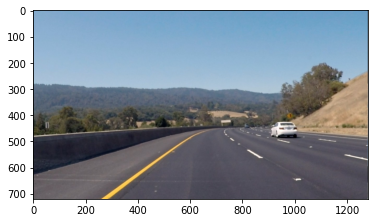

In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

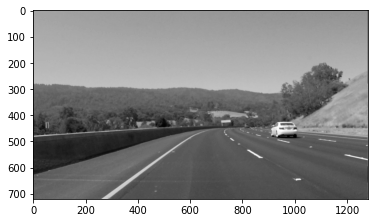

In [0]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

* 아래 실습은 edge detection을 위해서 자주 사용되는 Sobel filter를 사용해보도록 하겠습니다

* Sobel filter는 edge detection을 위해서 사용되는 filter로 

<img src="notebook_ims/sobel_ops.png" width=200 height=200>


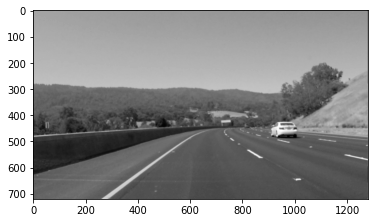

In [0]:
blur = np.array([[ 0.1, 0.1, 0.1], 
                   [ 0.1, 0.1, 0.1], 
                   [ 0.1, 0.1, 0.1]])

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, blur)

plt.imshow(filtered_image, cmap='gray')

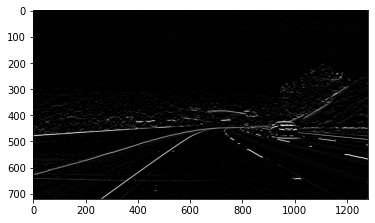

In [0]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.transpose(sobel_y)

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_y)

plt.imshow(filtered_image, cmap='gray')

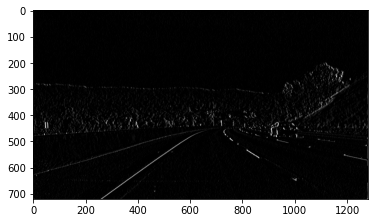

In [0]:
sobel_x = np.transpose(sobel_y)
# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, sobel_x)

plt.imshow(filtered_image, cmap='gray')

# Convolutional Layer

* 아래에서는 4개의 fileter를 통해서 4개의 activation map을 적용해보도록 합니다. 
* 본 작업은 한개의 convolutional layer를 구현하여 실행합니다

* Training 없이 4개의 filter를 임의로 설정하여, 각 결과를 보도록 하겠습니다
* 이를 위해서 convolutional layer의 weight들을 설정한 filter들로 초기화 하겠습니다

<img src='notebook_ims/conv_layer.gif' height=60% width=60% />

### Import the image

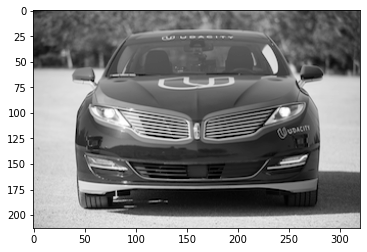

In [0]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

# TODO: Feel free to try out your own images here by changing img_path
# to a file path to another image on your computer!
img_path = 'data/udacity_sdc.png'

# load color image 
bgr_img = cv2.imread(img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

### Define and visualize the filters

In [0]:
import numpy as np

## TODO: Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])

print('Filter shape: ', filter_vals.shape)


Filter shape:  (4, 4)


In [0]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above

# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = np.array([filter_1, filter_2, filter_3, filter_4])

# For an example, print out the values of filter 1
print('Filter 1: \n', filter_1)

Filter 1: 
 [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


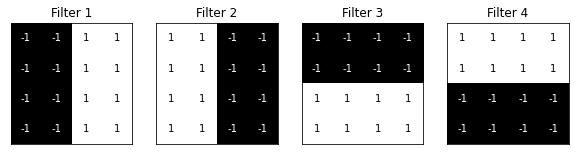

In [0]:
# visualize all four filters
fig = plt.figure(figsize=(10, 5))
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## Define a convolutional layer 


* Convolutional layer를 위 filter로 초기화합니다


In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


### Visualize the output of each filter

결과를 보기위한 plot 함수

In [0]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

* convolution 결과

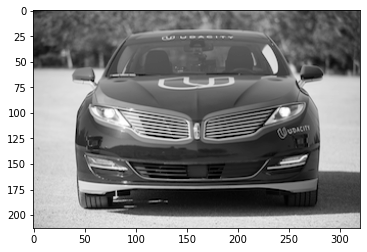

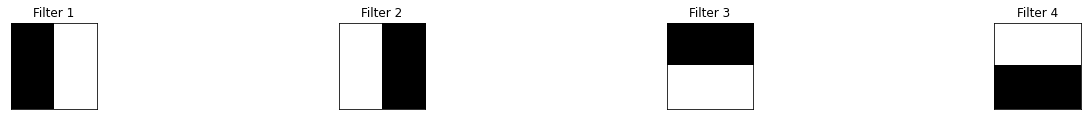

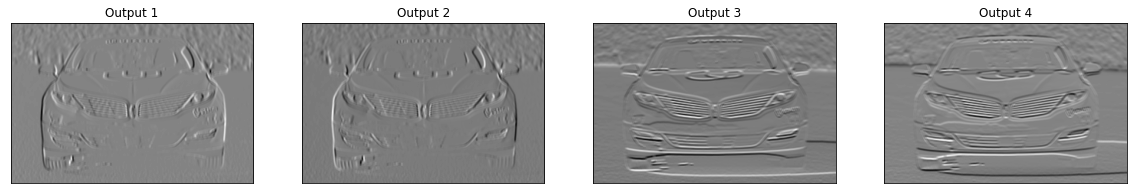

In [0]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

#### ReLu activation

<img src='notebook_ims/relu_ex.png' height=50% width=50% />

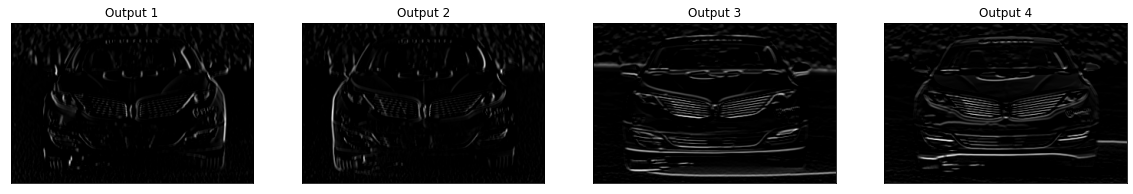

In [0]:
# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)

# Maxpooling Layer

In this notebook, we add and visualize the output of a maxpooling layer in a CNN. 

A convolutional layer + activation function, followed by a pooling layer, and a linear layer (to create a desired output size) make up the basic layers of a CNN.

<img src='notebook_ims/CNN_all_layers.png' height=50% width=50% />

### Define convolutional and pooling layers


* Pooling layer

* Maxpooling layer, [documented here](http://pytorch.org/docs/stable/_modules/torch/nn/modules/pooling.html), kernel 크기가 (2x2) 경우 input의 크기를 반으로 줄이는 효과를 봅니다. 

A maxpooling layer reduces the x-y size of an input and only keeps the most *active* pixel values. Below is an example of a 2x2 pooling kernel, with a stride of 2, applied to a small patch of grayscale pixel values; reducing the x-y size of the patch by a factor of 2. Only the maximum pixel values in 2x2 remain in the new, pooled output.

<img src='notebook_ims/maxpooling_ex.png' height=50% width=50% />

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a convolutional layer with four filters
# AND a pooling layer of size (2, 2)
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # applies pooling layer
        pooled_x = self.pool(activated_x)
        
        # returns all layers
        return conv_x, activated_x, pooled_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


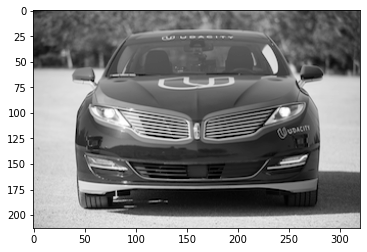

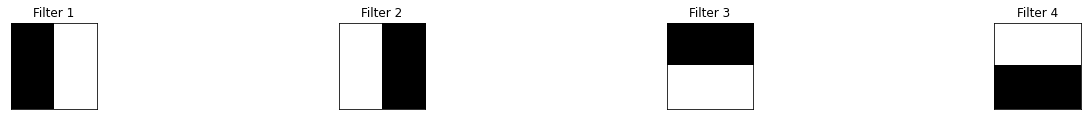

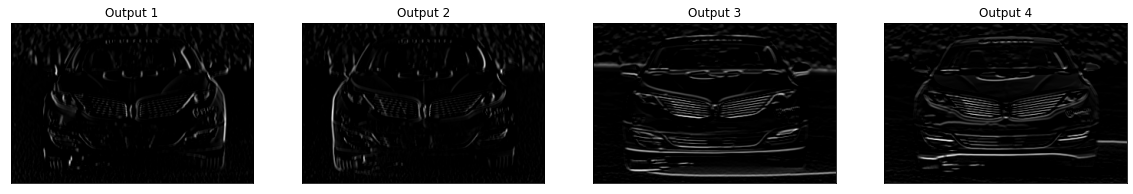

In [0]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

### Visualize the output of the pooling layer


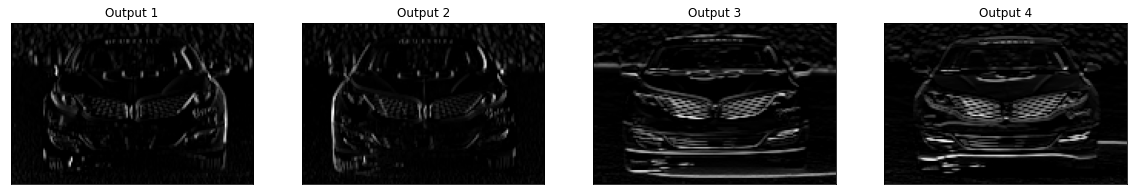

In [0]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)